<div style="border-left: padding-left: 1px; background:#f9fdff " >
<h2>Plotting Skeletons</h2>
    

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h2>Plotting Meshwork Skeletons</h2>

Put simply, a meshwork seamlessly integrates a mesh, and skeleton, and annotations of a neuron. Annotations may contain things like synapse locations and radius of each node in the meshwork. In this notebook we will go over how to plot skeletons using meshworks in the google bucket. 
    
You may want to create your own meshwork files on neurons that are not included in the google bucket. In that case, see the 'EM_meshwork_creation.ipynb' notebook to learn how to create a meshwork from scratch. Note that some of the parameters in plpt_mw_skel will not work on the meshworks that you create from scratch as many of the annotations that they rely on were created in a postprocessing pipeline that are not all outlined in the meshwork creation notebook. 

<h3> Prerequisites:</h3>
To run this notebook please be sure to have skeleton_plot (<code>pip install skeleton_plot</code>) installed.

In [1]:
import skeleton_plot as skpl 
from skeleton_plot import skel_io
import caveclient

import matplotlib.pyplot as plt

client = caveclient.CAVEclient('minnie65_public')
client.materialize.version = 661


meshwork_path = 'https://storage.googleapis.com/allen-minnie-phase3/minniephase3-emily-pcg-skeletons/minnie_all/v661/meshworks/'


In [2]:
# a function that will create the appropriate filename for a meshwork in the google bucket  
def create_filename(root_id, client_view = 'single_neurons', extension = 'h5'):
    
    # find soma id    
    sid = int(client.materialize.query_view(client_view, filter_equal_dict = {'pt_root_id': root_id})['id'])
    
    return f'{root_id}_{sid}.{extension}'



<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h3>A great place to find accurate, complete EM neurons is the proofreading table</h3>
    We will use the id numbers found in the <code>pt_root_id</code> column for this example


In [3]:
proof_df = client.materialize.query_table('proofreading_status_public_release')
proof_df.head(1)

,id,created,superceded_id,valid,valid_id,status_dendrite,status_axon,pt_supervoxel_id,pt_root_id,pt_position
0,1,2023-04-05 04:49:26.276806+00:00,NaN,t,864691134884807418,extended,extended,105913344770753749,864691134884807418,"[299067, 123129, 22993]"


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h3>Load the meshwork</h3>
    

In [4]:
pt_root_id = 864691134884807418
meshwork_filename = create_filename(pt_root_id)
mw = skel_io.load_mw(meshwork_path, create_filename(864691134884807418))


/var/folders/83/46p_c5l13yj6hlln3xpmfz0r0000gn/T/ipykernel_24736/2771239759.py:5: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  sid = int(client.materialize.query_view(client_view, filter_equal_dict = {'pt_root_id': root_id})['id'])
/var/folders/83/46p_c5l13yj6hlln3xpmfz0r0000gn/T/ipykernel_24736/2771239759.py:5: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  sid = int(client.materialize.query_view(client_view, filter_equal_dict = {'pt_root_id': root_id})['id'])


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h3>Simple plot just passing mw</h3>


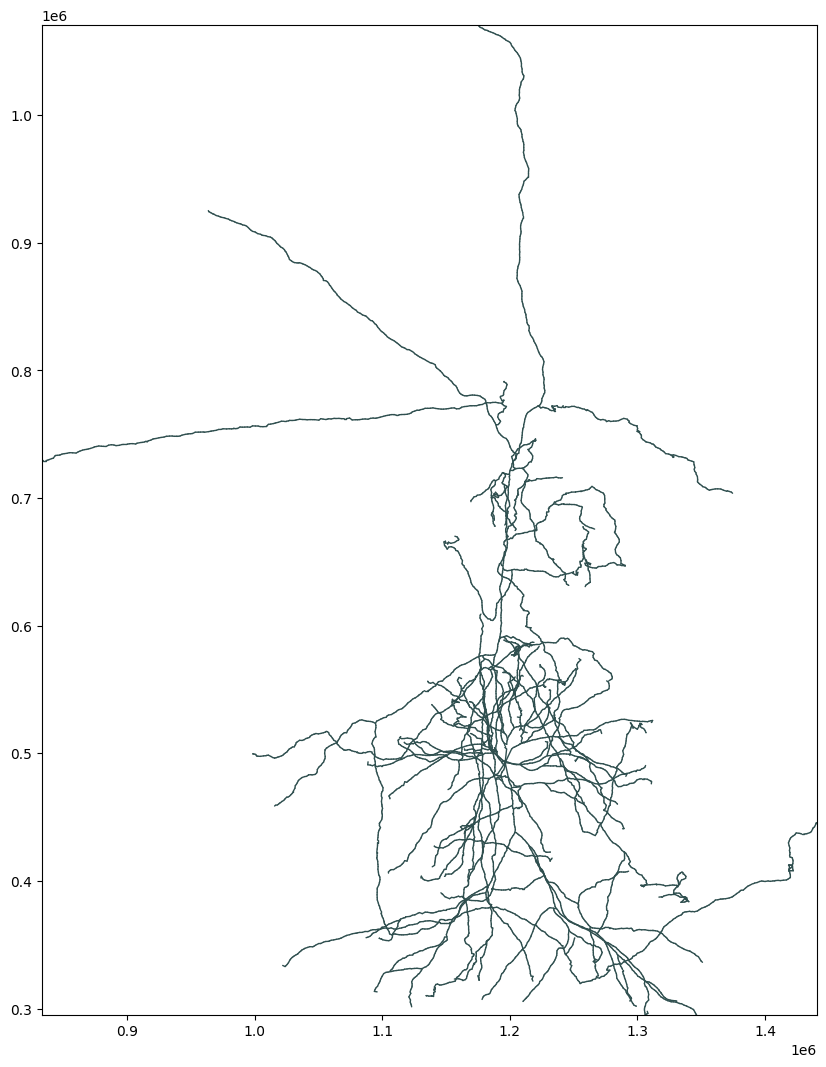

In [5]:
fig, ax = plt.subplots(figsize = (10,20))
skpl.plot_tools.plot_mw_skel(mw)

                     

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h3>The meshworks are upside down, so set the invert_y argument to True</h3>
we can also plot a point at the soma 


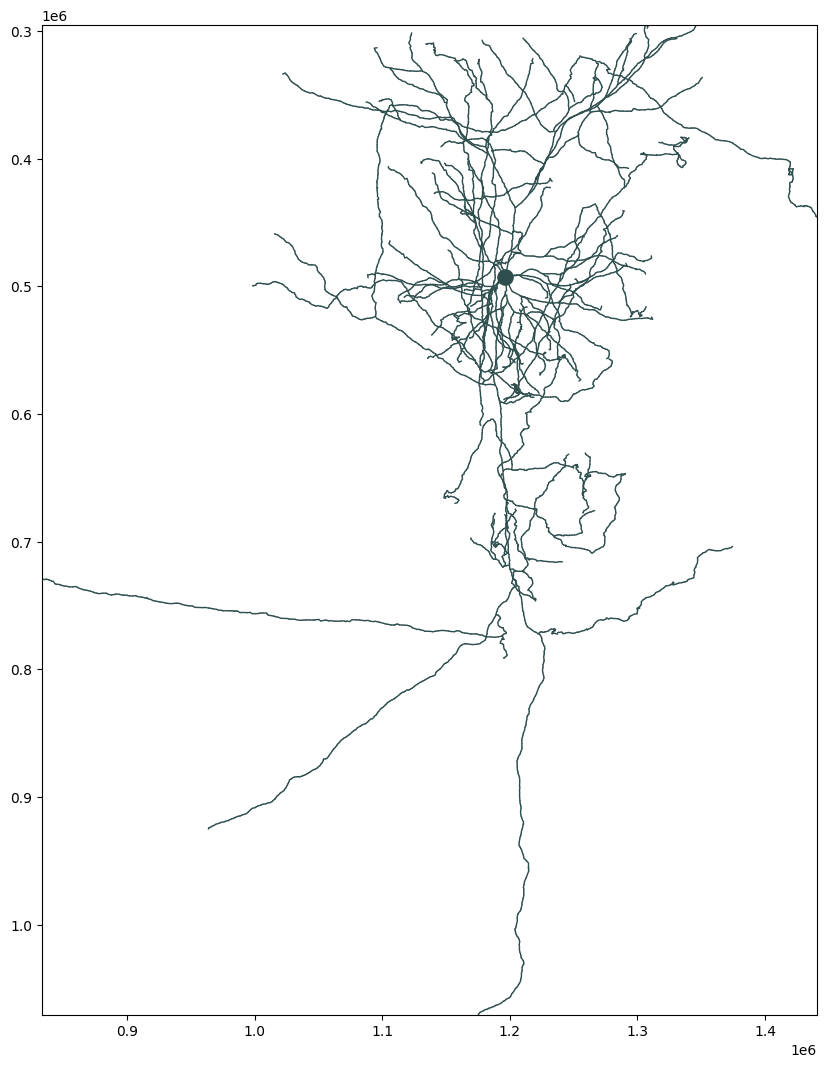

In [6]:
# these are upside down, so invert y 
fig, ax = plt.subplots(figsize = (10,20))

skpl.plot_tools.plot_mw_skel(mw, invert_y=True, plot_soma = True)


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
    <h3>Great! Now we can plot certain attributes from the google bucket neurons</h3>
    
With these google bucket meshworks, we can pull data from the annotation tables and plot them such as compartment labels, indicating which nodes are axons (blue), basal dendrites (red) and apical dendrites for excitatory neurons (pink)


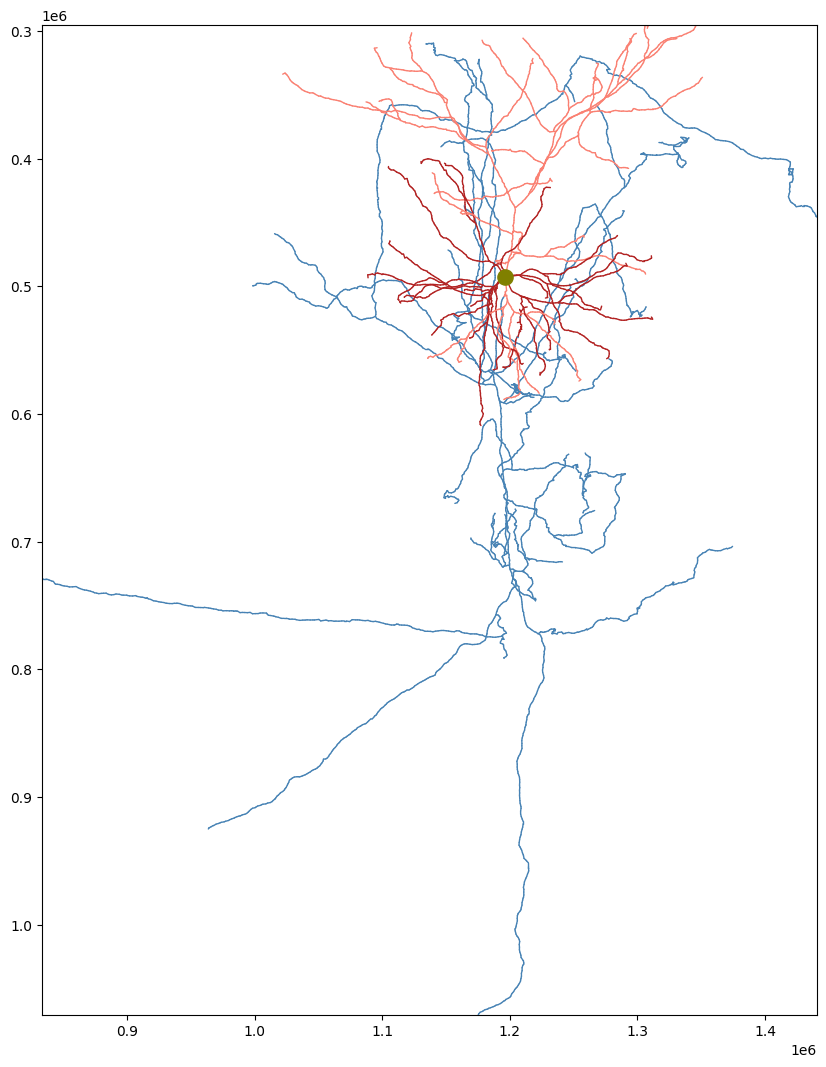

In [7]:
fig, ax = plt.subplots(figsize = (10,20))

skpl.plot_tools.plot_mw_skel(mw, invert_y=True, pull_compartment_colors=True, 
                            plot_soma = True)


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
    <h3>We can also change the radius of the skeleton nodes we plot, as well as pull and plot the radius of each node</h3>
    
We can set the width of the lines in the plot using the line_width argument \
We can pull and plot radius data from these google bucket meshworks using pull_radius \
We can use the line_width argument and the pull_radius argument to enlarge the pulled radius 



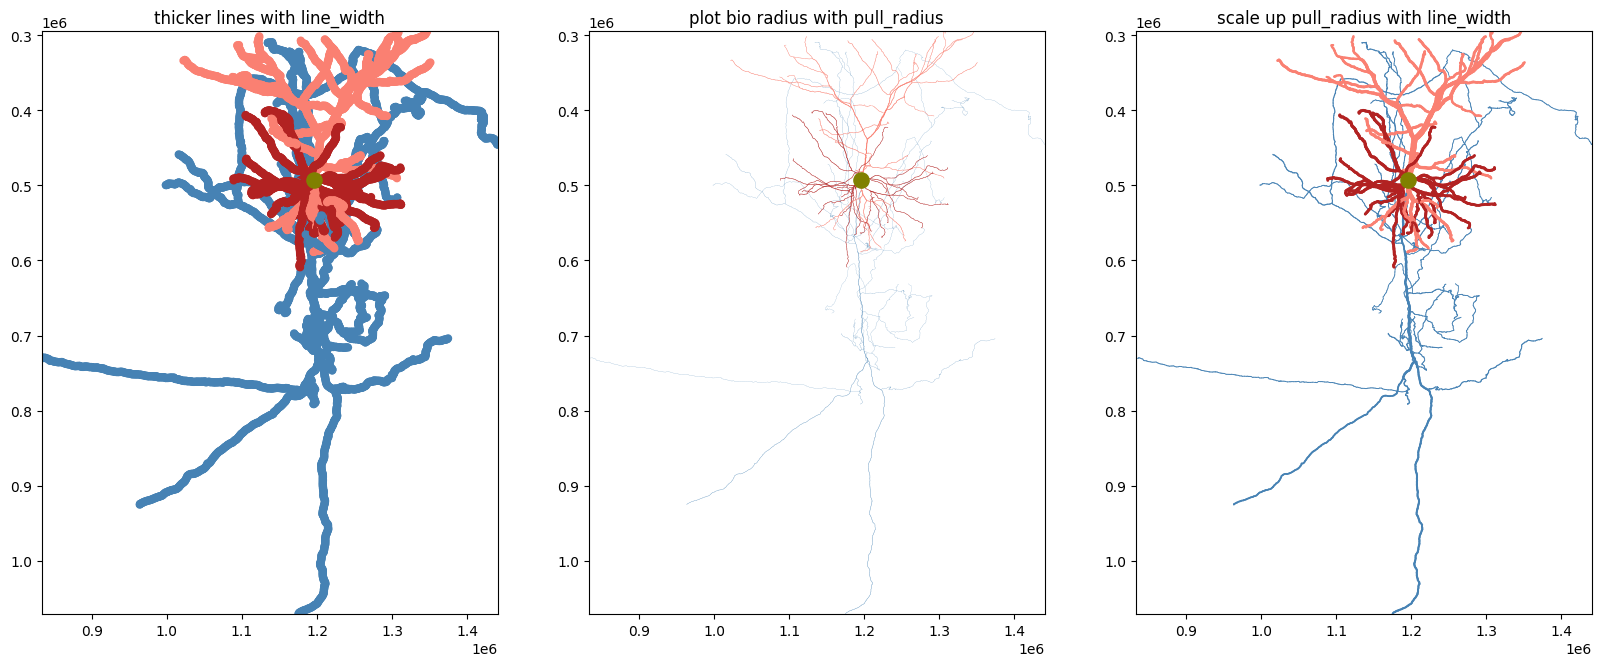

In [8]:
# pull out and plot the radius of each point 
fig, ax = plt.subplots(1,3, figsize = (20,20))

# plot thicker lines with line_width
skpl.plot_tools.plot_mw_skel(mw, invert_y=True, pull_compartment_colors=True, 
                            plot_soma = True, line_width = 6, ax = ax[0], 
                            title = 'thicker lines with line_width')

# pull the biological radius of each node with pull_radius
skpl.plot_tools.plot_mw_skel(mw, invert_y=True, pull_compartment_colors=True, 
                            plot_soma = True, pull_radius=True, ax = ax[1], 
                            title = 'plot bio radius with pull_radius')

# scale up the values from pull_radius with line_width
skpl.plot_tools.plot_mw_skel(mw, invert_y=True, pull_compartment_colors=True, 
                            plot_soma = True, pull_radius=True, line_width = 6, ax = ax[2],
                            title = 'scale up pull_radius with line_width')



<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
    <h3>We can plot the pre and pose synaptic sites, and we can plot from other angles</h3>
    
Pulls data from annotation tables in the meshwork to plot pre and post synaptic sites  \
We can change the axes from which we view the neuron \



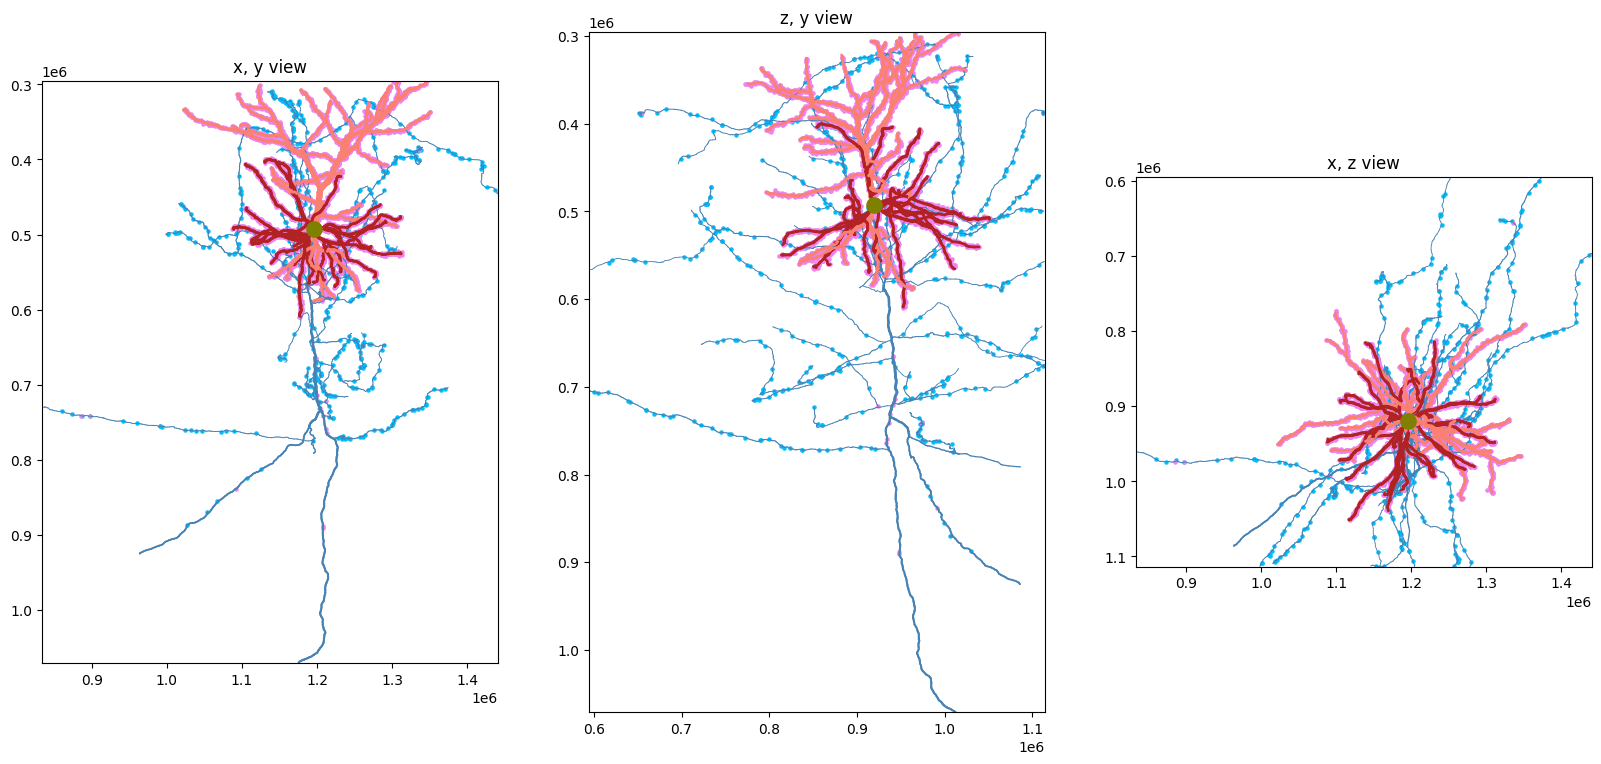

In [9]:
fig, ax = plt.subplots(1,3, figsize = (20,20))

# plot synapses on the standard x, y view 
skpl.plot_tools.plot_mw_skel(mw, invert_y=True, pull_compartment_colors=True, 
                            plot_soma = True, pull_radius=True, line_width = 6, 
                            plot_presyn = True, plot_postsyn = True, 
                            ax = ax[0], title = 'x, y view')
# z, y view
skpl.plot_tools.plot_mw_skel(mw, invert_y=True, pull_compartment_colors=True, 
                            plot_soma = True, pull_radius=True, line_width = 6, 
                            plot_presyn = True, plot_postsyn = True, 
                            x = 'z', y = 'y', ax = ax[1], title = 'z, y view')

# x, z view
skpl.plot_tools.plot_mw_skel(mw, invert_y=True, pull_compartment_colors=True, 
                            plot_soma = True, pull_radius=True, line_width = 6, 
                            plot_presyn = True, plot_postsyn = True, 
                            x = 'x', y = 'z', ax = ax[2], title = 'x, z view')


### Docstring for the `plot_mw_skel` function:

```python
skpl.plot_tools.plot_mw_skel(
    mw: <module 'meshparty.meshwork' from '/opt/anaconda3/envs/work/lib/python3.8/site-packages/meshparty/meshwork/__init__.py'>,
    plot_presyn=False,
    plot_postsyn=False,
    presyn_color='deepskyblue',
    postsyn_color='violet',
    presyn_size=5,
    postsyn_size=5,
    syn_res=[4, 4, 40],
    presyn_alpha=1,
    postsyn_alpha=1,
    skel_alpha=1,
    title='',
    line_width=1,
    x='x',
    y='y',
    radius=None,
    pull_radius=False,
    radius_anno='segment_properties',
    basal_anno='basal_mesh_labels',
    apical_anno='apical_mesh_labels',
    axon_anno='is_axon',
    plot_soma=False,
    soma_node=None,
    soma_size=120,
    invert_y=False,
    skel_colors=None,
    pull_compartment_colors=False,
    color='darkslategray',
    skel_color_map={3: 'firebrick', 4: 'salmon', 2: 'steelblue', 1: 'olive'},
    x_min_max=None,
    y_min_max=None,
    capstyle='round',
    joinstyle='round',
    pre_anno={'pre_syn': 'pre_pt_position'},
    post_anno={'post_syn': 'post_pt_position'},
    ax=None,
)
```

<h2>Here are the parameters for the plot_mw_skel function</h2>   

<table style="float: left; background-color: #b1e2fa">
    <tr>
        <td><h2>Parameter</h2></td>
        <td><h2>Description</h2></td>
    </tr> 
    <tr>
        <td>mw</td>
        <td>meshparty meshwork object that contains the skeleton, L2 graph, and annotations (synapses, radius of each node etc) of a neuron</td>
    </tr>
        <tr>
        <td>plot_presyn/plot_postsyn</td>
        <td>whether or not to pull the presynaptic/postsynaptic site locations from the meshwork annotation mw.anno.presyn and to plot them </td>
    </tr>
    <tr>
        <td>presyn_color/postsyn_color</td>
        <td>color of the presynaptic/postsynaptic points. presyn defaults to 'deepskyblue', postsyn defaults to violet</td>
    </tr>
    <tr>
        <td>presyn_size/postsyn_size</td>
        <td>size of the points of the presynaptic/postsynaptic sites. both default to 5</td>
    </tr>
    <tr>
        <td>syn_res</td>
        <td>resolution of synapse data that you wish to plot. defaults to [4,4,40] as that will convert synapse table points found in the meshwork synapse annotations into the same coordinate space as the meshwork nodes</td>
    </tr>
    <tr>
        <td>presyn_alpha/postsyn_alpha</td>
        <td>opacity of pre/postsynaptic points. Pass values between 0 and 1. Defaults to 1, meaning opaque. </td>
    </tr> 
    <tr>
        <td>skel_alpha</td>
        <td>opacity of skeleton nodes. Pass values between 0 and 1. Defaults to 1, meaning opaque.</td>
    </tr>
    <tr>
        <td>title</td>
        <td>title of the plot. defaults to blank. </td>
    </tr>
    <tr>
        <td>line_width</td>
        <td>when used without radius/pull_radius, sets the width of all lines in skeleton to the specified value. When used in conjunction with radius/pull_radius, will take the radius of each node, then multiply that value by what is passed in line_width.</td>
    </tr>
    <tr>
        <td>pull_radius</td>
        <td>whether or not to pull radius info from an annotation table and plot. scale up/down with line_width argument. </td>
    </tr>
    <tr>
        <td>radius</td>
        <td>list of mesh radii, same length as mesh indices indicating the radius to be plotted at each node. scale up/down with line_width argument. </td>
    </tr>
    <tr>
        <td>radius_anno</td>
        <td>which annotation table to pull the radius data from. defaults to 'segment_properties', which will work for all meshworks pulled from the google bucket</td>
    </tr>
    <tr>
        <td>skel_colors</td>
        <td>list of colors for each mesh node, same length as mesh indices indicating the color to be plotted at each node.</td>
    </tr>
    <tr>
        <td>color</td>
        <td>single color to use for every node in the skeleton. overwritten by other color arguments. defaults to 'darkslategray'</td>
    </tr>
    <tr>
        <td>pull_compartment_colors</td>
        <td>whether or not to pull the compartments from the annotation tables and plot them as colors. tables from which to pull this data specified in following parameters. Color for each compartment in following parameter. Mapping used here is 1 - soma,
2 - axon,
3 - (basal) dendrite,
4 - apical dendrite</td>
    </tr>
    <tr>
        <td>skel_color_map</td>
        <td>color map for the compartments. defaults to {3: 'firebrick', 4: 'salmon', 2: 'steelblue', 1: 'olive'} </td>
    </tr>
        <tr>
        <td>basal_anno</td>
        <td>which annotation table to pull the basal dendrite labels from. defaults to 'basal_mesh_labels', which will work for all meshworks pulled from the google bucket</td>
    </tr>
    <tr>
        <td>apical_anno</td>
        <td>which annotation table to pull the apical dendrite labels from. defaults to 'apical_mesh_labels', which will work for all meshworks pulled from the google bucket</td>
    </tr>
    <tr>
        <td>axon_anno</td>
        <td>which annotation table to pull the axon labels from. defaults to 'is_axon', which will work for all meshworks pulled from the google bucket</td>
    </tr>    
    <tr>
        <td>pre_anno/post_anno</td>
        <td>annotation in which pre and postsyn data can be found. defaults to {'pre_syn': 'pre=_pt_position'}/{'post_syn': 'post_pt_position'}, which will work for all meshworks pulled from the google bucket. </td>
    </tr>
    <tr>
        <td>x</td>
        <td>which axis to plot on x axis. can pass 'x', 'y', or 'z'. defaults to 'x' </td>
    </tr>
    <tr>
        <td>y</td>
        <td>which axis to plot on y axis. can pass 'x', 'y', or 'z'. defaults to 'x' </td>
    </tr>
    <tr>
        <td>plot_soma</td>
        <td>wheather or not to plot a larger point on the location of the soma. Defaults to False</td>
    </tr>
    <tr>
        <td>soma_node</td>
        <td>which mesh node index is the soma. Defaults to pull this information from the meshwork. </td>
    </tr>
    <tr>
        <td>soma_size</td>
        <td>Size of the dot that is optionally plotted at the soma node. Defaults to 120</td>
    </tr>
    <tr>
        <td>invert_y</td>
        <td>boolean to invert the y axis. Defaults to False</td>
    </tr>
    <tr>
        <td>x_min_max/y_min_max</td>
        <td>min and max x/y values to plot</td>
    </tr>

    

</table>
